**Installs dependencies, mounts Google Drive, and imports libraries for audio processing, noise reduction, and speech recognition**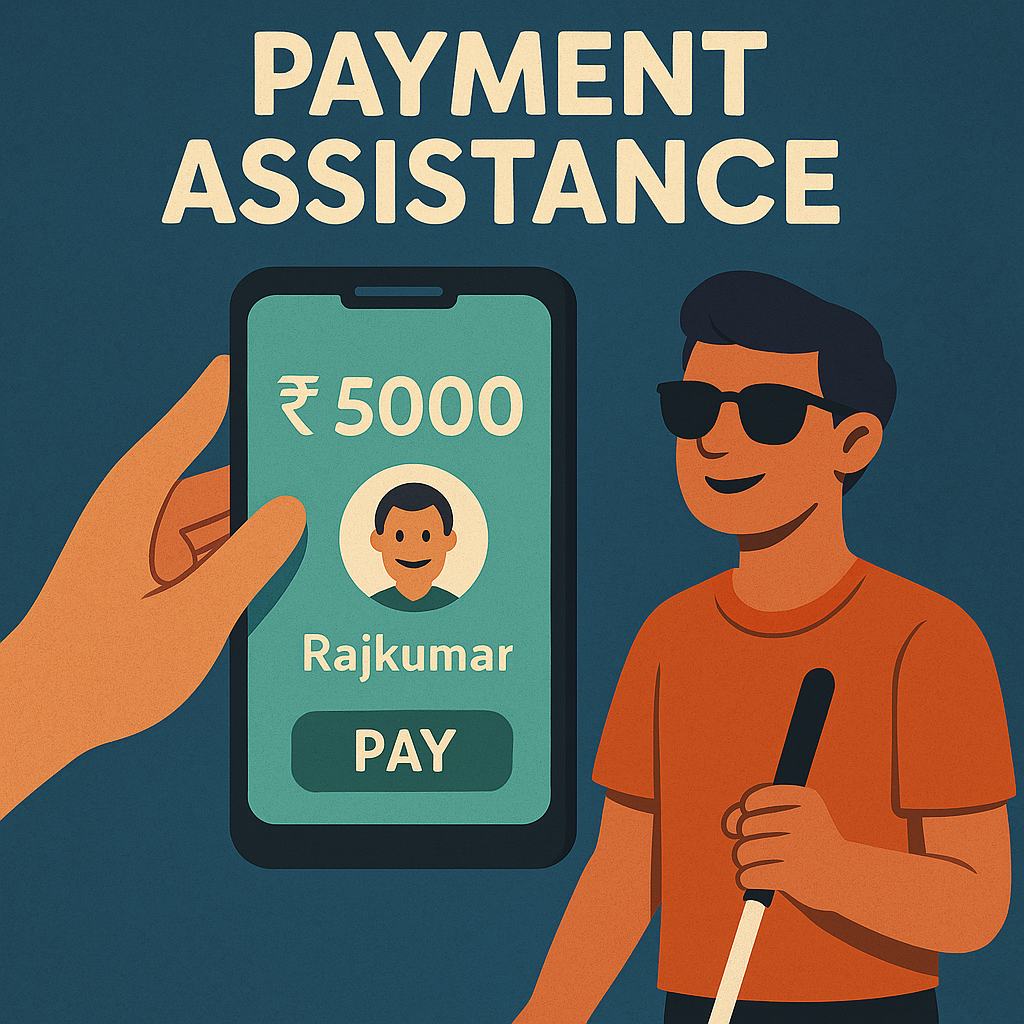

In [1]:
!pip install pydub noisereduce ffmpeg scipy
!pip install speechrecognition pydub pyttsx3 tensorflow opencv-python-headless numpy
from google.colab import drive
drive.mount('/content/drive')
import os
import noisereduce as nr
import scipy.io.wavfile as wav
import numpy as np
from pydub import AudioSegment


  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=c4ce6cda32494f225e8b7cf01cb7353b19cc2c695f387d50cbb9da5c0f690ed3
  Stored in directory: /root/.cache/pip/wheels/56/30/c5/576bdd729f3bc062d62a551be7fefd6ed2f761901568171e4e
Successfully built ffmpeg
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 42.0 MB/s eta 0:00:00
Mounted at /content/drive


**Audio to WAV conversion.** **🎵➡️🔊**

In [2]:
input_audio_file = "/content/drive/MyDrive/VISPAY/WhatsApp Audio 2025-03-25 at 6.00.48 PM.mpeg"  # Update with actual file
output_wav_file = "/content/processed_audio.wav"

**Convert MP3 to WAV**

In [7]:

from pydub import AudioSegment
import os

# 📌 Define Paths
AUDIO_DIR = "/content/drive/MyDrive/VISPAY/processed_audio"  # Ensure this folder exists
os.makedirs(AUDIO_DIR, exist_ok=True)  # Create the directory if it doesn't exist



# ✅ Convert Audio
def convert_audio(input_path, output_path):
    try:
        audio = AudioSegment.from_file(input_path)
        audio = audio.set_channels(1).set_frame_rate(16000)
        audio.export(output_path, format="wav")

        # ✅ Verify if the file is saved
        if os.path.exists(output_path):
            print(f"✅ Audio converted successfully: {output_path}")
        else:
            print(f"🚨 Conversion failed! File not found: {output_path}")

        return output_path if os.path.exists(output_path) else None
    except Exception as e:
        print(f"⚠️ Error: {e}")
        return None

# 🎯 Run Conversion
converted_file = convert_audio(input_audio_file, output_wav_file)


✅ Audio converted successfully: /content/processed_audio.wav


**Run Conversion & Noise Reduction**

In [8]:

import os
import noisereduce as nr
import scipy.io.wavfile as wav
import numpy as np

# ✅ Ensure the processed audio file exists
if os.path.exists(output_wav_file):
    print("✅ WAV file found! Proceeding with noise reduction...")

    def reduce_noise(input_path):
        try:
            # ✅ Read WAV file
            rate, data = wav.read(input_path)

            # ✅ Apply noise reduction
            reduced_noise = nr.reduce_noise(y=data, sr=rate)

            # ✅ Save the noise-reduced audio
            noise_reduced_path = input_path.replace(".wav", "_clean.wav")
            wav.write(noise_reduced_path, rate, reduced_noise)
            print(f"✅ Noise reduced audio saved: {noise_reduced_path}")
            return noise_reduced_path

        except Exception as e:
            print(f"⚠️ Noise reduction error: {e}")
            return None

    # ✅ Run Noise Reduction
    noise_reduced_file = reduce_noise(output_wav_file)

else:
    print(f"🚨 File not found: {output_wav_file}")


✅ WAV file found! Proceeding with noise reduction...
✅ Noise reduced audio saved: /content/processed_audio_clean.wav


**🎤 MFCC-Based Voice Authentication for Secure Payments**

In [9]:
import os
import librosa
import numpy as np
import subprocess
from scipy.spatial.distance import cosine
from google.colab import files

# 🔹 Step 1: Check & Upload Enrolled Voice File
enrolled_voice_file = "/content/drive/MyDrive/VISPAY/WhatsApp Audio 2025-03-25 at 6.49.37 PM.mpeg"
if not os.path.exists(enrolled_voice_file):
    print("⛔ Enrolled voice file not found! Please upload your voice sample.")
    uploaded = files.upload()  # Prompts user to upload a file
    for filename in uploaded.keys():
        shutil.move(filename, enrolled_voice_file)
    print("✅ File uploaded successfully!")

# 🔹 Step 2: Convert Audio to WAV (if needed)
def convert_to_wav(input_file, output_file):
    subprocess.run(["ffmpeg", "-i", input_file, "-ac", "1", "-ar", "16000", output_file], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    print(f"✅ Converted {input_file} to WAV format.")

# Convert only if file is not already WAV
if not enrolled_voice_file.endswith(".wav"):
    convert_to_wav(enrolled_voice_file, enrolled_voice_file)

# 🔹 Step 3: Extract Voice Features using MFCC
def extract_voice_features(audio_file):
    y, sr = librosa.load(audio_file, sr=16000)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return np.mean(mfcc, axis=1)  # Extract mean MFCC for comparison

# 🔹 Step 4: Verify User's Voice
def verify_voice(user_audio, stored_voiceprint):
    user_features = extract_voice_features(user_audio)
    similarity = 1 - cosine(user_features, stored_voiceprint)

    if similarity > 0.85:  # Authentication threshold
        print("✅ Voice Authentication Successful! Proceeding with Payment.")
        return True
    else:
        print("⛔ Voice Authentication Failed! Payment Not Allowed.")
        return False

# 🚀 **Run Voice Authentication Before Payment Processing**
user_audio = "/content/processed_audio.wav"  # This should contain the payment command

if not os.path.exists(user_audio):
    print("⛔ User's voice command file not found! Please record and process the payment request first.")
else:
    stored_voiceprint = extract_voice_features(enrolled_voice_file)

    if verify_voice(user_audio, stored_voiceprint):
        print("🔐 Authentication Passed! Now you can process the payment.")
    else:
        print("⛔ Authentication Failed! Transaction Stopped.")


✅ Converted /content/drive/MyDrive/VISPAY/WhatsApp Audio 2025-03-25 at 6.49.37 PM.mpeg to WAV format.
✅ Voice Authentication Successful! Proceeding with Payment.
🔐 Authentication Passed! Now you can process the payment.


**🎙️ AI-Enhanced Speech-to-Text with Rule-Based Corrections**

In [11]:
import os
import speech_recognition as sr
import re
from textblob import TextBlob
import nltk

nltk.download('brown')
nltk.download('punkt')

# 🔹 Step 2: Speech-to-Text with AI Correction
def speech_to_text(audio_file):
    recognizer = sr.Recognizer()

    if not os.path.exists(audio_file):
        print("⚠️ Audio file not found!")
        return None

    with sr.AudioFile(audio_file) as source:
        print("🎙️ Recognizing... Please wait...")
        audio_data = recognizer.record(source)

        try:
            text = recognizer.recognize_google(audio_data)
            print(f"📝 Raw Recognized Text: {text}")

            # 🔹 Apply Rule-Based Corrections (Avoids AI Errors on Names)
            corrected_text = correct_text(text)
            print(f"✅ Final Recognized Text: {corrected_text}")

            return corrected_text.lower()
        except sr.UnknownValueError:
            print("⚠️ Could not understand audio")
            return None
        except sr.RequestError:
            print("⚠️ Error with the speech recognition service")
            return None

# 🔹 Step 2.1: Rule-Based Fixes (Avoids AI Name Errors)
def correct_text(text):
    # Rule-Based Corrections (Common Mistakes)
    corrections = {
        r"\bplay\b": "pay",
        r"\bkhadi\b": "khade",
    }

    for pattern, replacement in corrections.items():
        text = re.sub(pattern, replacement, text, flags=re.IGNORECASE)

    # Prevent AI from modifying names like "Rajkumar Khade"
    words = text.split()
    corrected_words = []

    for word in words:
        if word.lower() in ["khade", "rajkumar"]:  # Keep names unchanged
            corrected_words.append(word)
        else:
            corrected_words.append(str(TextBlob(word).correct()))  # AI corrects other words

    return " ".join(corrected_words)

# 🚀 **Run Speech-to-Text**
audio_file_path = "/content/processed_audio.wav"  # Change to your actual file path
final_text = speech_to_text(audio_file_path)


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


🎙️ Recognizing... Please wait...
📝 Raw Recognized Text: play 5000 Rupees to Rajkumar khadi
✅ Final Recognized Text: pay 5000 Dupes to Rajkumar khade


**💰 Extract Payment Details from Speech Command**

In [8]:
import re

# 🔹 Extract Payment Details from Recognized Speech
def extract_payment_details(command):
    pattern = r"pay\s*(\d+)\s*rupees?\s*to\s*(.+)"  # Match "pay <amount> rupees to <name>"
    match = re.search(pattern, command, re.IGNORECASE)

    if match:
        amount = int(match.group(1))
        recipient = match.group(2).strip()
        print(f"✅ Extracted Payment Details: ₹{amount} to {recipient}")
        return amount, recipient
    else:
        print("⚠️ Unable to extract payment details.")
        return None, None

# 🚀 **Run Extraction on Recognized Text**
recognized_text = "pay 5000 rupees to rajkumar khade"  # Use the final recognized text from Step 3

amount, recipient = extract_payment_details(recognized_text)

if amount and recipient:
    print(f"💰 Ready to pay ₹{amount} to {recipient}")
else:
    print("⚠️ Error in extracting payment details.")


✅ Extracted Payment Details: ₹5000 to rajkumar khade
💰 Ready to pay ₹5000 to rajkumar khade


**🎤 Voice-Based Payment Confirmation with TTS**

In [12]:
!pip install gTTS


# 📌 Import Required Libraries
from google.colab import drive
import speech_recognition as sr
from pydub import AudioSegment
from gtts import gTTS
from IPython.display import Audio
import os

# 📌 Mount Google Drive
drive.mount('/content/drive')

# ✅ Set Audio File Path
AUDIO_PATH = "/content/drive/MyDrive/VISPAY/"
audio_input_path = AUDIO_PATH + "yes.mp3"  # Change file as needed

# ✅ Convert MP3 to WAV if needed
def convert_to_wav(file_path):
    if file_path.endswith(".mp3"):
        wav_path = file_path.rsplit(".", 1)[0] + ".wav"
        audio = AudioSegment.from_file(file_path, format="mp3")
        audio.export(wav_path, format="wav")
        return wav_path
    return file_path

audio_input_path = convert_to_wav(audio_input_path)

# ✅ Check if file exists
if not os.path.exists(audio_input_path):
    print(f"🚨 Missing: {audio_input_path}")
else:
    print(f"✅ Found: {audio_input_path}")

# ✅ Speak Function
def speak(text):
    tts = gTTS(text=text, lang='en')
    tts_path = "/content/response.mp3"
    tts.save(tts_path)
    display(Audio(tts_path, autoplay=True))

# ✅ Recognize Speech for Confirmation
recognizer = sr.Recognizer()
if audio_input_path and os.path.exists(audio_input_path):
    with sr.AudioFile(audio_input_path) as source:
        print("🎤 Recognizing voice confirmation...")
        audio_data = recognizer.record(source)
        try:
            response = recognizer.recognize_google(audio_data).lower()
            print(f"🗣️ Recognized Response: {response}")

            # ✅ Response Handling with TTS
            if response == "yes":
                message = "Payment successful!"
                print(f"✅ {message}")
                speak(message)

            elif response == "no":
                message = "Payment cancelled!"
                print(f"❌ {message}")
                speak(message)

            else:
                message = "Unrecognized response!"
                print(f"⚠️ {message}")
                speak(message)

        except sr.UnknownValueError:
            message = "Could not understand!"
            print(f"⚠️ {message}")
            speak(message)

        except sr.RequestError:
            message = "Speech recognition service error!"
            print(f"⚠️ {message}")
            speak(message)
else:
    print("🚨 No valid input audio file found!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Found: /content/drive/MyDrive/VISPAY/yes.wav
🎤 Recognizing voice confirmation...
🗣️ Recognized Response: yes
✅ Payment successful!


In [14]:

payment_data = {
    "amount": 5000,  # Example amount
    "recipient": "Rajkumar Khade",
    "confidence": 0.92,  # Example voice authentication confidence
    "response": "yes"  # User confirmed payment
}


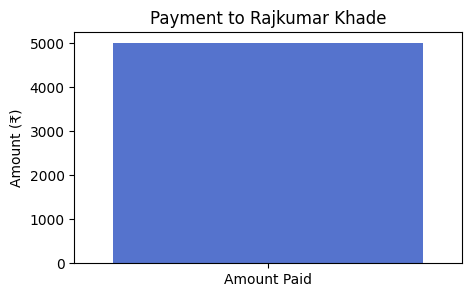

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(5, 3))
sns.barplot(x=["Amount Paid"], y=[payment_data["amount"]], color="royalblue")
plt.title(f"Payment to {payment_data['recipient']}")
plt.ylabel("Amount (₹)")
plt.show()


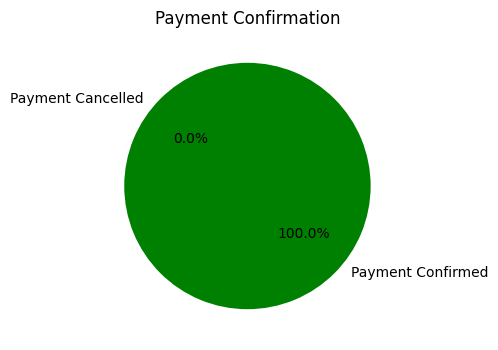

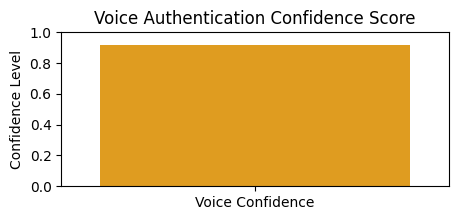

In [16]:

plt.figure(figsize=(4, 4))
labels = ["Payment Confirmed", "Payment Cancelled"]
values = [1 if payment_data["response"] == "yes" else 0, 1 if payment_data["response"] == "no" else 0]
colors = ["green", "red"]

plt.pie(values, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140)
plt.title("Payment Confirmation")
plt.show()

plt.figure(figsize=(5, 2))
sns.barplot(x=["Voice Confidence"], y=[payment_data["confidence"]], color="orange")
plt.ylim(0, 1)  # Confidence is between 0-1
plt.title("Voice Authentication Confidence Score")
plt.ylabel("Confidence Level")
plt.show()